# Kaggle_survey_2021_Responses

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#clean">Data Cleaning And Preparation </a>
    <ul>
    <li><a href ="#replace">Replace Header</a></li>
         
</ul>
       <ul>
    <li><a href="#split"> Split Function </a></li>
</ul>
    <ul>
        <li><a href="#merge"> Merge Function</a></ul>
        <li><a href="#fast">Fast Finish Participant(Country) </a></li>
        <li><a href="#gender_country">Most Gender & his country in Survey </a></li>
        <li><a href="#chart_gender_country">Chart For Most Gender and his country  </a></li>
        <li><a href="#count_years">Numbers Of Years Writing Code  </a></li>    
        <li><a href="#education_high">Highest Education Level partner in survey </a></li>
        <li><a href="#Q7">Most Programming Language(Question 7) </a></li>
        <li><a href="#chart_Q7">Chart For Most Programming Language(Question 7) </a></li>    
        <li><a href="#Question 9">Qusetion 9 : Which of the following integrated development environments (IDE's) do you use on a regular basis?</a>
<ul>
    <li><a href="#who_most_use_ides?"> Who Use Most IDEs   </a></li>
</ul>
     <li><a href="#Q10"> Question 10 : Which of the following hosted notebook products do you use on a regular basis?  </a></li>
      <li><a href="#chart_notebook"> Chart For Hosted Notebook Products  </a></li>        
      <li><a href="#count_answers"> Most Country Answer In Most Question  </a></li>        
      <li><a href="#most_q_answers"> Most Question have answers </a></li>   
      <li><a href="#most_answer_q8"> Get Most Answer in This Question & Count it & Get All Answers in Chart </a></li>  
      <li><a href="#q8_country"> Most Answer in Question 8 & the most of country that make this Answer </a></li>  
      <li><a href="#most_age"> Most Age Answer in Questions </a></li>  
      <li><a href="#gender_q"> Most Gender Answer in Questions & Most Question Answer it</a></li>  

<li><a href="#conc">Conclusions</a></li>

</ul>

<a id='intro'></a>
# Introduction

Its awesome Experiment to analysis as this data..i try make different operations to training myself and learn alot of functions to make this analysis ...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
kaggle = pd.read_csv('kaggle_survey_2021_responses.csv')

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
kaggle.info()
kaggle.head(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER


<a id='clean'></a>
 Clean And preparation

In [4]:
kaggle.duplicated().sum()

0

In [5]:
#We Don't Need To remove Null or empty records because Answers that involve multiple choices, or the lack of answers to some questions
kaggle.isnull().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                         0
                                       ...  
Q38_B_Part_8                           24953
Q38_B_Part_9                           25307
Q38_B_Part_10                          23226
Q38_B_Part_11                          21431
Q38_B_OTHER                            25596
Length: 369, dtype: int64

<a id='replace'></a>
We Need To Replace The Header to First row ..TO Be Clear With DATA. 

In [6]:
#get header of Table with (iloc[0]) then combine the header (Q1,....) to second header (Questions Sentnses)
first_header = kaggle.iloc[0]
kaggle.columns = kaggle.columns+ "-"+ first_header
kaggle.head(3)


,Time from Start to Finish (seconds)-Duration (in seconds),Q1-What is your age (# years)?,Q2-What is your gender? - Selected Choice,Q3-In which country do you currently reside?,Q4-What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Q5-Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Q6-For how many years have you been writing code and/or programming?,Q7_Part_1-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,Q7_Part_2-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,Q7_Part_3-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"Q38_B_Part_3-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","Q38_B_Part_4-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","Q38_B_Part_5-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","Q38_B_Part_6-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","Q38_B_Part_7-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","Q38_B_Part_8-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - ClearML","Q38_B_Part_9-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","Q38_B_Part_10-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - MLflow","Q38_B_Part_11-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","Q38_B_OTHER-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [7]:
#Remove First Row Because its be with Header .
kaggle = kaggle.iloc[1:,:]

In [8]:
kaggle.head(3)

,Time from Start to Finish (seconds)-Duration (in seconds),Q1-What is your age (# years)?,Q2-What is your gender? - Selected Choice,Q3-In which country do you currently reside?,Q4-What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Q5-Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Q6-For how many years have you been writing code and/or programming?,Q7_Part_1-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,Q7_Part_2-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,Q7_Part_3-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"Q38_B_Part_3-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","Q38_B_Part_4-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","Q38_B_Part_5-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","Q38_B_Part_6-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","Q38_B_Part_7-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","Q38_B_Part_8-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - ClearML","Q38_B_Part_9-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","Q38_B_Part_10-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - MLflow","Q38_B_Part_11-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","Q38_B_OTHER-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='merge'></a>
Function : Merge Columns

In [9]:
#This Function is For Merge All Columns Of The Same Number Of Question In One Variable For Easy Call It .
def merge_col (question):
    question_rename = kaggle[kaggle.columns[pd.Series(kaggle.columns).str.startswith(question)]]
    return(question_rename)

<a id='split'></a>
Function:  Split Word Of Header 

In [10]:
# This Function is For Split The Word From Question Because The Question is Too long  & We Want To Easy Call it and count It .
def split(split_word):
    split_data = split_word.rename(columns=lambda x: x.split(" -")[2])
    return(split_data)

In [11]:
kaggle.head(2)

,Time from Start to Finish (seconds)-Duration (in seconds),Q1-What is your age (# years)?,Q2-What is your gender? - Selected Choice,Q3-In which country do you currently reside?,Q4-What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Q5-Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Q6-For how many years have you been writing code and/or programming?,Q7_Part_1-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,Q7_Part_2-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,Q7_Part_3-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"Q38_B_Part_3-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","Q38_B_Part_4-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","Q38_B_Part_5-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","Q38_B_Part_6-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","Q38_B_Part_7-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","Q38_B_Part_8-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - ClearML","Q38_B_Part_9-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","Q38_B_Part_10-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - MLflow","Q38_B_Part_11-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","Q38_B_OTHER-In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


<a id='fast'></a>
    Fast Finish The Survey Participant 

In [12]:
# Use groupby to get column of time with country then count of values & get the smallest time 
Time_finish_country = kaggle.groupby('Time from Start to Finish (seconds)-Duration (in seconds)')['Q3-In which country do you currently reside?'].value_counts().nsmallest(10)

In [13]:
Time_finish_country 

Time from Start to Finish (seconds)-Duration (in seconds)  Q3-In which country do you currently reside?
121                                                        Other                                           1
                                                           Taiwan                                          1
122                                                        South Korea                                     1
                                                           United States of America                        1
123                                                        India                                           1
                                                           Russia                                          1
                                                           Turkey                                          1
                                                           United Arab Emirates                            1
                        

In [14]:
#put data in DataFrame 
pd.DataFrame(Time_finish_country)

Q3-In which country do you currently reside?
Time from Start to Finish (seconds)-Duration (i... Q3-In which country do you currently reside?                                              
121                                                Other                                                                                    1
                                                   Taiwan                                                                                   1
122                                                South Korea                                                                              1
                                                   United States of America                                                                 1
123                                                India                                                                                    1
                                                   Russia                                                                                   1
                                                   Turkey                                                                                   1
                                                   United Arab Emirates                                                                     1
                                                   Viet Nam                                                                                 1
124                                                Germany                                                                                  1

<a id='gender_country'></a>
       Which  Most Gender  With  Countries Participate With The Survey?

In [15]:
kaggle['Q2-What is your gender? - Selected Choice'].value_counts()

Man                        20598
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: Q2-What is your gender? - Selected Choice, dtype: int64

In [16]:
kaggle['Q3-In which country do you currently reside?'].value_counts().sort_values(ascending=False)

India                       7434
United States of America    2650
Other                       1270
Japan                        921
China                        814
                            ... 
Norway                        45
Kazakhstan                    45
Algeria                       44
Ethiopia                      43
Iraq                          43
Name: Q3-In which country do you currently reside?, Length: 66, dtype: int64

In [17]:
#ref (nlargest):https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html
highest_gender_country = kaggle.groupby(['Q2-What is your gender? - Selected Choice','Q3-In which country do you currently reside?'])['Q3-In which country do you currently reside?'].count().nlargest(10)

In [18]:
highest_gender_country
highest_gender_country=pd.DataFrame(highest_gender_country)
highest_gender_country

Q3-In which country do you currently reside?
Q2-What is your gender? - Selected Choice Q3-In which country do you currently reside?                                              
Man                                       India                                                                                 5681
                                          United States of America                                                              1949
Woman                                     India                                                                                 1656
Man                                       Other                                                                                 1004
                                          Japan                                                                                  836
                                          China                                                                                  672
                                          Brazil                                                                                 664
                                          Russia                                                                                 630
Woman                                     United States of America                                                               606
Man                                       Nigeria                                                                                594

<a id='chart_gender_country' ></a>
Chart For Gender With From Them Countries

<AxesSubplot:xlabel='Q2-What is your gender? - Selected Choice,Q3-In which country do you currently reside?'>

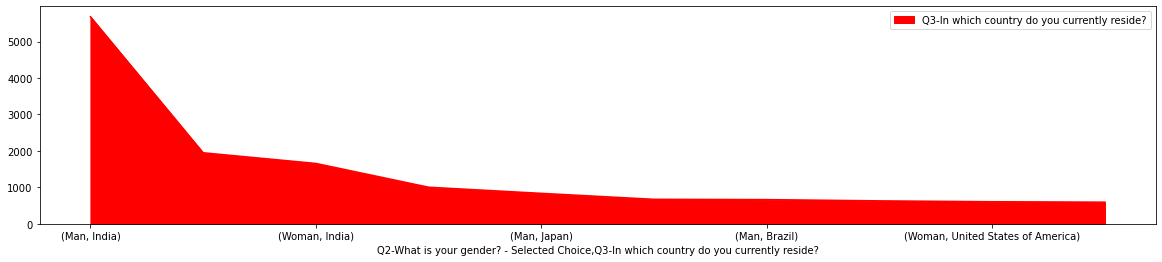

In [19]:
highest_gender_country.plot(kind='area',figsize=(20, 4), color="red")

<a id='count_years'></a>
Q-6  Numbers of Years writing code

In [20]:
b = kaggle['Q6-For how many years have you been writing code and/or programming?'].value_counts().reset_index()
b

,index,Q6-For how many years have you been writing code and/or programming?
0,1-3 years,7874
1,< 1 years,5881
2,3-5 years,4061
3,5-10 years,3099
4,10-20 years,2166
5,20+ years,1860
6,I have never written code,1032


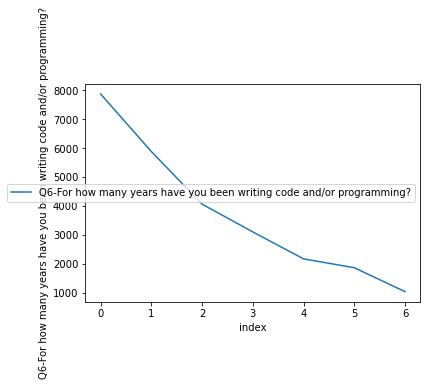

In [21]:
b.plot(xlabel="index", ylabel="Q6-For how many years have you been writing code and/or programming?");


<a id="education_high"></a>
Which  Highest Education Level Participate With The Survey?

In [22]:
# Get count of education level from each country by grouping Question 3 with Q4 and put it in variable (Most_education_country)
Most_education_country =kaggle.groupby('Q4-What is the highest level of formal education that you have attained or plan to attain within the next 2 years?')['Q3-In which country do you currently reside?'].value_counts().nlargest(10)

In [23]:
pd.DataFrame(Most_education_country)

Q3-In which country do you currently reside?
Q4-What is the highest level of formal educatio... Q3-In which country do you currently reside?                                              
Bachelor’s degree                                  India                                                                                 4008
Master’s degree                                    India                                                                                 2439
                                                   United States of America                                                              1235
Bachelor’s degree                                  United States of America                                                               714
Master’s degree                                    Other                                                                                  485
Doctoral degree                                    United States of America                                                               436
Bachelor’s degree                                  Other                                                                                  420
Master’s degree                                    China                                                                                  396
                                                   Japan                                                                                  384
Bachelor’s degree                                  Nigeria                                                                                363

<a id="Q7"></a>
(Question7) How Many Programming Languages& Most Use from The participants. 

In [24]:
#We Have 13 Questions With 11  Programming languages  and one of (Other & None) ... (Python , Sql ,R,...)
#We Will Call Function (Merge) To Collect All Parts Of Question 7.
prog_lang = merge_col('Q7')


In [25]:
prog_lang

,Q7_Part_1-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,Q7_Part_2-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,Q7_Part_3-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,Q7_Part_4-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C,Q7_Part_5-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++,Q7_Part_6-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java,Q7_Part_7-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript,Q7_Part_8-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia,Q7_Part_9-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift,Q7_Part_10-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash,Q7_Part_11-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,Q7_Part_12-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None,Q7_OTHER-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other
1,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,Python,NaN,SQL,NaN,NaN,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
25970,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25972,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#Rename The name of Columns To Only Name Of languages To Be Clear (By Remove All String Before "-")
prog_rename = split(prog_lang)


<a id='chart_Q7'></a>
Chart For Counting Programming Language

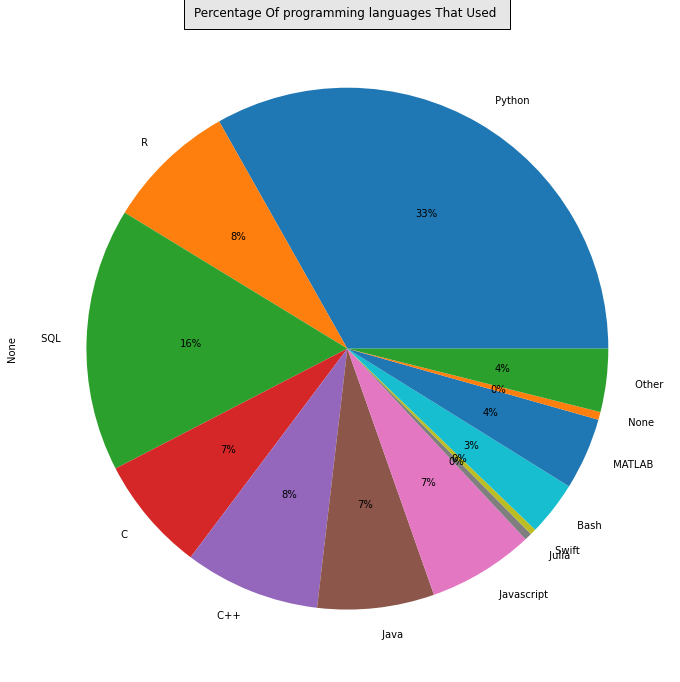

In [27]:
#How Many participants Use  IDE's ..  So We Need To remove Null Values To See If All Languges Use at the Same time.
#Ref:
#(https://stackoverflow.com/questions/27275236/pandas-best-way-to-select-all-columns-whose-names-start-with-x)
#https://www.w3resource.com/graphics/matplotlib/piechart/matplotlib-piechart-exercise-2.php
#https://datascienceparichay.com/article/pandas-rename-column-names/


count_prog = prog_rename.count()

plt.figure(figsize=(20,12))
plt.title("Percentage Of programming languages That Used ", bbox={'facecolor':'0.9', 'pad':10})

count_prog.plot(kind="pie", autopct='%1.0f%%' );

<a id='Question 9'></a>
Question 9 : Which of the following integrated development environments (IDE's) do you use on a regular basis?

In [28]:
#Collect All Question 9 In Variable (IDEs) By Get First Words (Q9)From All DataFrame.
IDEs = merge_col('Q9')

In [29]:
IDEs.head(2)

,"Q9_Part_1-Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc)",Q9_Part_2-Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - RStudio,Q9_Part_3-Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Visual Studio,Q9_Part_4-Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Visual Studio Code (VSCode),Q9_Part_5-Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - PyCharm,Q9_Part_6-Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Spyder,Q9_Part_7-Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Notepad++,Q9_Part_8-Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Sublime Text,Q9_Part_9-Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Vim / Emacs,Q9_Part_10-Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,Q9_Part_11-Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Jupyter Notebook,Q9_Part_12-Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - None,Q9_OTHER-Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Other
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN


In [30]:
#To Show Only Environment From All Question run split Function then put it into variable (most_ides )Then count & get high value
ides_split = split(IDEs)
most_ides =split(IDEs).count().idxmax()
most_ides


'  Jupyter Notebook'

In [31]:
#We Need To See How Many Participants  Use Most  IDE's 
#So.. We Will Remove Column( None) Then Count The IDEs Tables Without Nan
IDEs_without_NAN = ides_split.drop([" None"],axis = 1)
most_Ides = IDEs_without_NAN.dropna().value_counts().sum()
most_Ides

1

<a id='who_most_use_ides?'></a>
Who Use Most IDEs ?

In [32]:
# We Now Want Know Who the only person Use most IDEs..so We Should join Country ,Gender & Age Columns To IDEs .
age =kaggle['Q1-What is your age (# years)?']
country = kaggle['Q3-In which country do you currently reside?']
gender =kaggle['Q2-What is your gender? - Selected Choice']
info_ides = pd.concat([ides_split, age, country , gender ], axis=1, join="inner")
info_ides

,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,Visual Studio,Visual Studio Code (VSCode),PyCharm,Spyder,Notepad++,Sublime Text,Vim / Emacs,MATLAB,Jupyter Notebook,None,Other,Q1-What is your age (# years)?,Q3-In which country do you currently reside?,Q2-What is your gender? - Selected Choice
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN,NaN,50-54,India,Man
2,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,50-54,Indonesia,Man
3,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,Other,22-24,Pakistan,Man
4,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,45-49,Mexico,Man
5,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,MATLAB,Jupyter Notebook,NaN,NaN,45-49,India,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,NaN,NaN,Vim / Emacs,NaN,Jupyter Notebook,NaN,NaN,30-34,Egypt,Man
25970,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22-24,China,Man
25971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50-54,Sweden,Man
25972,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,45-49,United States of America,Man


In [33]:
#Remove 'None' 
info_ides = info_ides.drop([' None'],axis=1)

In [34]:
#Remove Nan From DataFrame (info_ides)..well get now the person who use most IDEs From India And His Age From 25-29
info_ides.dropna()

,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,Visual Studio,Visual Studio Code (VSCode),PyCharm,Spyder,Notepad++,Sublime Text,Vim / Emacs,MATLAB,Jupyter Notebook,Other,Q1-What is your age (# years)?,Q3-In which country do you currently reside?,Q2-What is your gender? - Selected Choice
17121,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,Visual Studio,Visual Studio Code (VSCode),PyCharm,Spyder,Notepad++,Sublime Text,Vim / Emacs,MATLAB,Jupyter Notebook,Other,25-29,India,Man


<a id='Q10'></a>
Question 10 : Which of the following hosted notebook products do you use on a regular basis?

In [35]:
#Use Function Merge To get Q10
Q10_notebook_products = merge_col('Q10')

In [36]:
#Get Most notebook products from 'nlargest'
Q10_notebook_products.count().nlargest(1)

Q10_Part_2-Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Colab Notebooks    9792
dtype: int64

In [37]:
#Get From Header Of Question 10 Abbreviation (hosted notebook products (Kaggle , colab ,Azure,...) ) To Clear Display  and put it in Variable (Q10_split).
Q10_split = split(Q10_notebook_products)



In [38]:
#Make column as  Notebook and count by set_axis
Q10_count =  Q10_split.count()
Q10_count=Q10_count.reset_index().set_axis(['Notebook','count'], axis=1)

In [39]:
#ascending to sort from high to low 
Q10_count.sort_values(by='count',ascending=False)

,Notebook,count
1,Colab Notebooks,9792
0,Kaggle Notebooks,9507
15,None,7174
9,Google Cloud Notebooks (AI Platform / Vertex ...,2051
10,Google Cloud Datalab,1794
4,Binder / JupyterHub,1770
6,IBM Watson Studio,1067
2,Azure Notebooks,1062
7,Amazon Sagemaker Studio Notebooks,753
16,Other,737


<a id= 'chart_notebook'></a>
Chart For Count Of Notebook 

Text(0, 0.5, 'count')

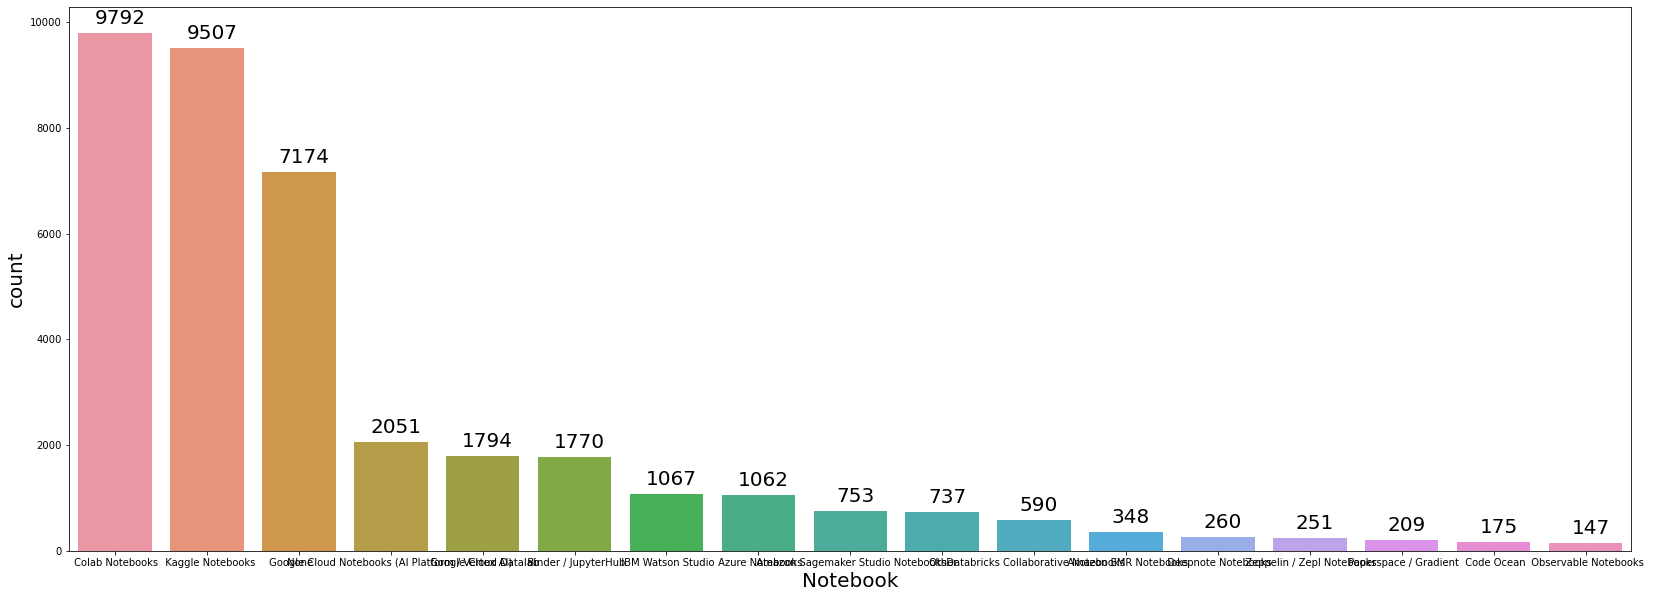

In [41]:
#Adding Notation to appear values in above of  bars and make sorting to show clear Maximum Values.
#Ref : https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/


plt.figure(figsize=(28, 10))


splot=sns.barplot(x="Notebook",y="count",data=Q10_count.sort_values(by='count',ascending=False))

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center',  size =20,
                   xytext = (5, 9), 
                   textcoords = 'offset points')
plt.xlabel("Notebook", size=20)
plt.ylabel("count", size=20)




<a id='count_answers'></a>
Most Country Answer In Most Question .

In [ ]:
# Use Melt to count the country column for all question
#Ref:https://www.youtube.com/watch?v=ZuTfB5NWOYE

most_country_Q = kaggle.melt( id_vars=['Q3-In which country do you currently reside?'])
most_country_Q

In [ ]:
# we found most answer in questions from india in this question .
most_country_Q.value_counts().idxmax()

In [ ]:
# df = kaggle.iloc[:,3:39]
# Here we get columns from Start of Question 7 to Last Question in Column 369 and put it in Variable (all_q)
all_q = kaggle.iloc[:,7:369]

<a id='most_q_answers'></a>
Most Question have answers

In [ ]:
#From Variable (all_q) we count all values and sorting by desccending to show easy all maximum Questions top of table.
most_q = all_q.count().sort_values(ascending=False)

In [ ]:
most_q
pd.DataFrame(most_q)

In [ ]:
# High 10 Questions have Answers
most_q_frame = pd.DataFrame(most_q).reset_index().set_axis(['Q','count'], axis=1)
most_q_frame= most_q_frame.nlargest(10,'count')
most_q_frame

<a id='most_answer_q8'></a>
Get Most Answer in This Question & Count it & Get All Answers in Chart .


In [ ]:
#highest answer
most_q.idxmax()

In [ ]:
most_q_answer= most_q.idxmax()
most_answer = kaggle[most_q_answer].value_counts()

In [ ]:
#Chart For All Answers in this Question 
most_answer.plot()

<a id='q8_country'></a>
Most Answer in Question 8 & the most of country that make this Answer.

In [ ]:
kaggle.groupby('Q8-What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice')['Q3-In which country do you currently reside?'].value_counts().idxmax()

<a id='most_age'></a>
Most Age Answer in Questions

In [ ]:
#filter age by function 'melt' to get numbers of each year record 
most_age_Q = kaggle.melt( id_vars=['Q1-What is your age (# years)?'])
most_age_Q

In [ ]:
#get high value by value_counts and idxmax for range of year and most question have the year
most_age_Q.value_counts().idxmax()

<a id='gender_q'></a>
Most Gender Answer in Questions & Most Question Answer it

In [ ]:
most_gender_Q = kaggle.melt( id_vars=['Q2-What is your gender? - Selected Choice'])
most_gender_Q.value_counts().idxmax()

<a id='conc'></a>

# Conclusions
* Fast Person Finish The Survey From Taiwan in 121 Seconds .
* Most Gender From Participants is Male by 20598 persons & Female is 4890 .
* Most Country is  India by 7434 Then United States of America is 2650 .
* Most Education Level Participants is Master’s degree by 10132 persons Then Bachelor’s degree with 9907 persons then Doctoral degree is 2795   .                                                .
* Most Participants Education From Country is Bachelor’s degree From India With 4008 Person .
* Most Programming Languages Used from The participants is Python with 33% Then Sql With 16% .
* Most integrated development environments (IDE's) do you use on a regular basis "Jupyter Notebook" .
* Most Person Use All IDEs Is  From India And His Age From 25-29 .
* Most hosted notebook products do you use on a regular basis is  (Colab Notebooks) by 9792  Then  (Kaggle Notebooks) by 9507 .
* Most Country Of Participants For Answers is India &  Question is "Q7_Part_1-What programming languages do you use on a regular basis? & Most "Answer is "Python" .
* Most Question Have Answers in "Q8-What programming language would you recommend an aspiring data scientist to learn first? and answer is "Python" Then
* Most Age of Participants Answer in Questions is '18-21' For Question "Q7_Part_1-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python"  Then Q 11 
* Most Gender Answer in Questions is ('Man','Q7_Part_1-What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python','Python') .

                                                     
                                                     